In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline

# Class 9: Business Cycle Data

The *business cycle* is the fluctuation of many macroeconomic quantities that last for about 1.5 to 8 years. Colloquially, the term refers to the alternating periods of expansion and contraction in the macroeconomy. Business cycle fluctuations are costly because they are associated with misallocations of capital and labor. The burden of recessions is particularly painful for workers that become unemployed and for the families of workers who become unemployed. The costs of the business cycle have driven research into understanding the cause of the cycle. The collective set of theories to explain the cycle is called *business cycle theory*.

In this lecture, we will:

1. Visualize the difference between the trend and cyclical components of GDP, consumption, investent, and hours.
2. Compute the log-deviations from trend of GDP, consumption, investent, and hours.
3. Compute summary statistics about the business cycle that models of the cycle should be able to explain.

## Data

The file `rbc_data.csv`, available at https://github.com/letsgoexploring/econ126/raw/master/Data/Csv/rbc_data_actual_trend.csv, contains actual and trend data for real GDP per capita, real consumption per capita, real investment per capita, and hours per capita. The GDP, consumption, and investment data are in terms of 2012 dollars. Hours is measured as an index with the value in October 2012 set to 100.

In [2]:
# Read rbc_data.csv into a Pandas DataFrame with the first column set as the index and parse_dates=True
df = pd.read_csv('https://github.com/letsgoexploring/econ126/raw/master/Data/Csv/rbc_data_actual_trend.csv',index_col=0,parse_dates=True)

# Print the last five rows of the data
df.tail()

,gdp,gdp_trend,consumption,consumption_trend,investment,investment_trend,hours,hours_trend,capital,capital_trend,tfp,tfp_trend
2017-07-01,71.126047,71.080934,48.508126,48.421582,12.396209,12.477461,107.031065,107.249285,81.418544,81.157519,26.390793,26.368779
2017-10-01,71.365922,71.328745,48.865541,48.616176,12.384235,12.554623,107.662510,107.521271,81.727131,81.443991,26.343841,26.384623
2018-01-01,71.594193,71.578471,48.868700,48.811739,12.659739,12.632608,108.025222,107.794275,82.023042,81.732483,26.337055,26.400698
2018-04-01,72.046962,71.829724,48.976078,49.008197,12.634448,12.711315,108.139296,108.068081,82.246215,82.022503,26.460262,26.416948
2018-07-01,72.497715,72.082118,49.308582,49.205510,13.022434,12.790656,108.393952,108.342615,82.609021,82.313737,26.544207,26.433277


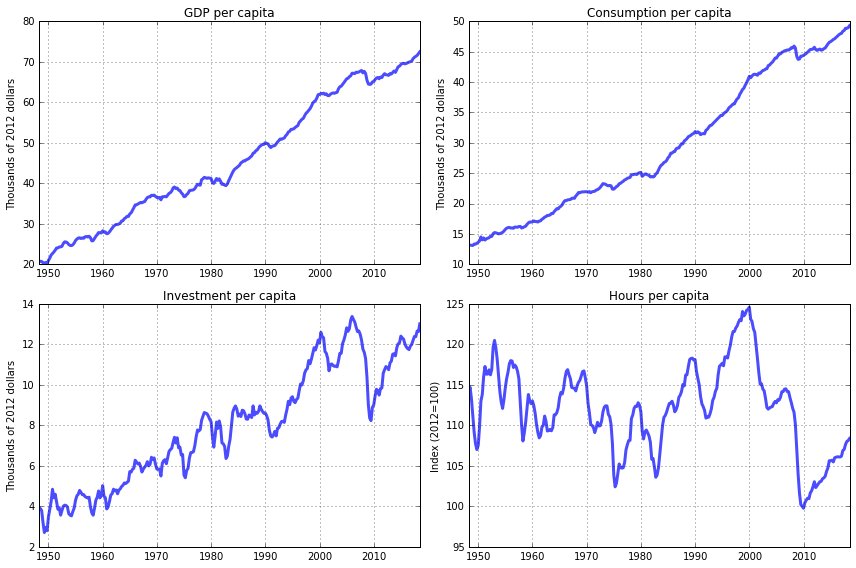

In [3]:
# Construct a 2x2 grid of plots of GDP, consumption, investment, and hours. CELL PROVIDED
base_year = '2012'
fig = plt.figure(figsize=(12,8))

ax1 = fig.add_subplot(2,2,1)
ax1.plot(df.gdp,'-',lw=3,alpha = 0.7)
ax1.grid()
ax1.set_title('GDP per capita')
ax1.set_ylabel('Thousands of '+base_year+' dollars')

ax2 = fig.add_subplot(2,2,2)
ax2.plot(df.consumption,'-',lw=3,alpha = 0.7)
ax2.grid()
ax2.set_title('Consumption per capita')
ax2.set_ylabel('Thousands of '+base_year+' dollars')

ax3 = fig.add_subplot(2,2,3)
ax3.plot(df.investment,'-',lw=3,alpha = 0.7)
ax3.grid()
ax3.set_title('Investment per capita')
ax3.set_ylabel('Thousands of '+base_year+' dollars')

ax4 = fig.add_subplot(2,2,4)
ax4.plot(df.hours,'-',lw=3,alpha = 0.7)
ax4.grid()
ax4.set_title('Hours per capita')
ax4.set_ylabel('Index ('+base_year+'=100)')

fig.tight_layout()

## Cycles and Trends

Business cycle theory is tested against data. However, data on the business cycle data is not readily available and must be constructed. A time series $X_t$ can be decomposed into a trend component $X_t^{trend}$ and a cyclical component $X_t^{cycle}$ such that:

\begin{align}
X_t & = X_t^{trend} + X_t^{cycle}. \tag{1}
\end{align}

In equation (1), $X_t^{trend}$ is the long-run value about which $X_t$ fluctuates. $X^{cycle}_t$ is the amount by which $X_t$ excedes its trend. The process for decomposing a series into trend and cyclical components is called *filtering* and is more technical than we want to get into. We'll take for granted that such procedures exist.

Often times, it's useful to express the cyclical component of a time series as the difference between the (natural) log of the series and the log of the trend:

\begin{align}
\hat{x}_t & = \log\left(X_t\right) - \log\left(X_t^{trend}\right) \approx\frac{X_t-X_t^{trend}}{X_t^{trend}}
\end{align} 

The log-deviation from trend is approximately equal to the percent deviation of the series from trend (divided by 100).

### GDP

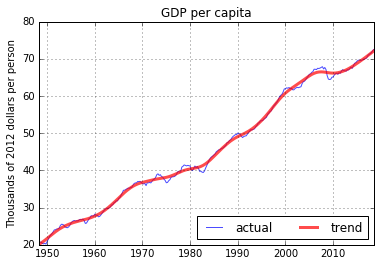

In [4]:
# Construct a plot of real GDP with its trend with:
#    1. Actual line: blue with lw=1, alpha=0.7, label = 'actual'
#    2. Trend line:  red with lw=3, alpha=0.7, label = 'trend'
plt.plot(df.gdp,'-',lw=1,alpha = 0.7,label='actual')
plt.plot(df.gdp_trend,'r-',lw=3,alpha = 0.7,label='trend')
plt.grid()
plt.ylabel('Thousands of '+base_year+' dollars per person')
plt.title('GDP per capita')
plt.legend(loc='lower right',ncol=2)

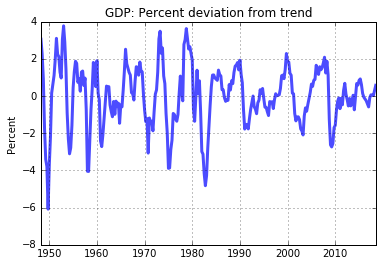

In [5]:
# Create a new column called gdp_cycle equal to the difference between acual and trend GDP
df['gdp_cycle'] = df['gdp'] - df['gdp_trend']

# Create a new column called gdp_cycle_dev equal to the log difference between actual GDP and trend GDP:
df['gdp_cycle_dev'] = np.log(df['gdp']) - np.log(df['gdp_trend'])

# Plot the log deviation of GDP from its trend (times 100)
plt.plot(df.gdp_cycle_dev*100,'b-',lw=3,alpha = 0.7)
plt.ylabel('Percent')
plt.title('GDP: Percent deviation from trend')
plt.grid()

### Consumption, Investment, and Hours

In [6]:
# Create three new columns called cons_cycle, invest_cycle, and hours_cycle equal to the cyclical components of the 
# respective series
df['cons_cycle'] = df['consumption'] - df['consumption_trend']
df['invest_cycle'] = df['investment'] - df['investment_trend']
df['hours_cycle'] = df['hours'] - df['hours_trend']


# Create a new column called cons_cycle_dev, invest_cycle_dev, and hours_cycle_dev equal to the log difference between 
# the actual and trend values of the respective series:
df['cons_cycle_dev'] = np.log(df['consumption']) - np.log(df['consumption_trend'])
df['invest_cycle_dev'] = np.log(df['investment']) - np.log(df['investment_trend'])
df['hours_cycle_dev'] = np.log(df['hours']) - np.log(df['hours_trend'])


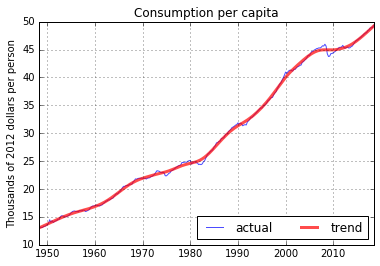

In [7]:
# Construct a plot of consumption with its trend
#    1. Actual line: blue with lw=1, alpha=0.7, label = 'actual'
#    2. Trend line:  red with lw=3, alpha=0.7, label = 'trend'
plt.plot(df.consumption,'-',lw=1,alpha = 0.7,label='actual')
plt.plot(df.consumption_trend,'r-',lw=3,alpha = 0.7,label='trend')
plt.grid()
plt.ylabel('Thousands of '+base_year+' dollars per person')
plt.title('Consumption per capita')
plt.legend(loc='lower right',ncol=2)

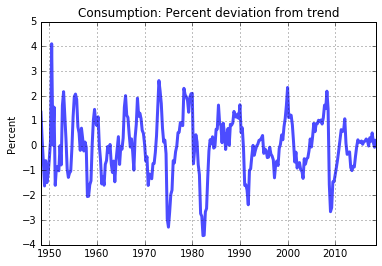

In [8]:
# Plot the log deviation of consumption from its trend (times 100)
plt.plot(df.cons_cycle_dev*100,'b-',lw=3,alpha = 0.7)
plt.ylabel('Percent')
plt.title('Consumption: Percent deviation from trend')
plt.grid()

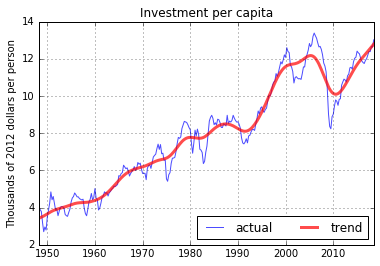

In [9]:
# Construct a plot of investment with its trend
#    1. Actual line: blue with lw=1, alpha=0.7, label = 'actual'
#    2. Trend line:  red with lw=3, alpha=0.7, label = 'trend'
plt.plot(df.investment,'-',lw=1,alpha = 0.7,label='actual')
plt.plot(df.investment_trend,'r-',lw=3,alpha = 0.7,label='trend')
plt.grid()
plt.ylabel('Thousands of '+base_year+' dollars per person')
plt.title('Investment per capita')
plt.legend(loc='lower right',ncol=2)

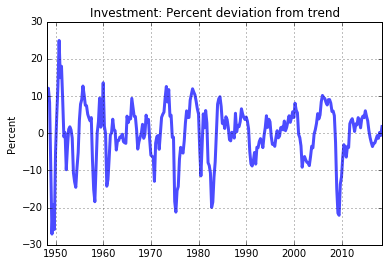

In [10]:
# Plot the log deviation of investment from its trend (times 100)
plt.plot(df.invest_cycle_dev*100,'b-',lw=3,alpha = 0.7)
plt.ylabel('Percent')
plt.title('Investment: Percent deviation from trend')
plt.grid()

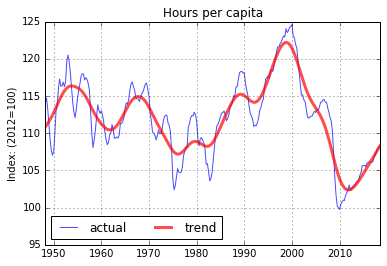

In [11]:
# Construct a plot of hours with its trend
#    1. Actual line: blue with lw=1, alpha=0.7, label = 'actual'
#    2. Trend line:  red with lw=3, alpha=0.7, label = 'trend'
plt.plot(df.hours,'-',lw=1,alpha = 0.7,label='actual')
plt.plot(df.hours_trend,'r-',lw=3,alpha = 0.7,label='trend')
plt.ylabel('Index: ('+base_year+'=100)')
plt.title('Hours per capita')
plt.legend(loc='lower left',ncol=2)
plt.grid()

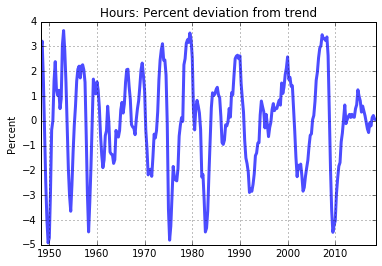

In [12]:
# Plot the log deviation of hours from its trend (times 100)
plt.plot(df.hours_cycle_dev*100,'b-',lw=3,alpha = 0.7)
plt.ylabel('Percent')
plt.title('Hours: Percent deviation from trend')
plt.grid()

## US Business Cycle Statistics

In [13]:
# Create a new variable called df_cycle thatis sa DataFrame with columns columns gdp_cycle_dev, cons_cycle_dev, 
# invest_cycle_dev, and hours_cycle_dev from df.
df_cycle = df[['gdp_cycle_dev', 'cons_cycle_dev', 'invest_cycle_dev', 'hours_cycle_dev']]

# Print the first five rows of df_cycle
print(df_cycle.head())

            gdp_cycle_dev  cons_cycle_dev  invest_cycle_dev  hours_cycle_dev
1948-04-01       0.030544        0.013470          0.107616         0.029364
1948-07-01       0.022722        0.002314          0.120836         0.032108
1948-10-01       0.009278       -0.006468          0.083071         0.017377
1949-01-01      -0.017602       -0.016276         -0.096043        -0.003461
1949-04-01      -0.034097       -0.006075         -0.271160        -0.024279


In [14]:
# Use the DataFrame method .mean() to find the average values of the gdp_cycle_dev, cons_cycle_dev, invest_cycle_dev, 
# and hours_cycle_dev columns
df_cycle.mean()

gdp_cycle_dev      -6.999287e-14
cons_cycle_dev     -6.701653e-14
invest_cycle_dev   -1.396479e-14
hours_cycle_dev    -1.234190e-13
dtype: float64

In [15]:
# Use the DataFrame method .std() to find the standard deviations of the gdp_cycle_dev, cons_cycle_dev, invest_cycle_dev, 
# and hours_cycle_dev columns
df_cycle.std()

gdp_cycle_dev       0.016135
cons_cycle_dev      0.011674
invest_cycle_dev    0.074887
hours_cycle_dev     0.018893
dtype: float64

In [16]:
# Use the DataFrame method .corr() to find the coeficients of correlation among the gdp_cycle_dev, cons_cycle_dev, 
# invest_cycle_dev, and hours_cycle_dev columns
df_cycle.corr()

,gdp_cycle_dev,cons_cycle_dev,invest_cycle_dev,hours_cycle_dev
gdp_cycle_dev,1.000000,0.793926,0.844668,0.874094
cons_cycle_dev,0.793926,1.000000,0.670665,0.705015
invest_cycle_dev,0.844668,0.670665,1.000000,0.785609
hours_cycle_dev,0.874094,0.705015,0.785609,1.000000


**Questions**

1. Which quantity varies the most over the business cycle?
2. Which quantity varies the least over the business cycle?
3. Which quantity is most correlated with GDP over the business cycle?

**Answers**

1. Consumption fluctuates the least over the business cycle.<!-- answer -->
2. Investment fluctuates the most over the business cycle.<!-- answer -->
1. Hours is the quantity that is most correlated with GDP over the cycle. Since the capital stock changes slowly over time, large fluctuations due primarily to large fluctuations in employment.<!-- answer -->

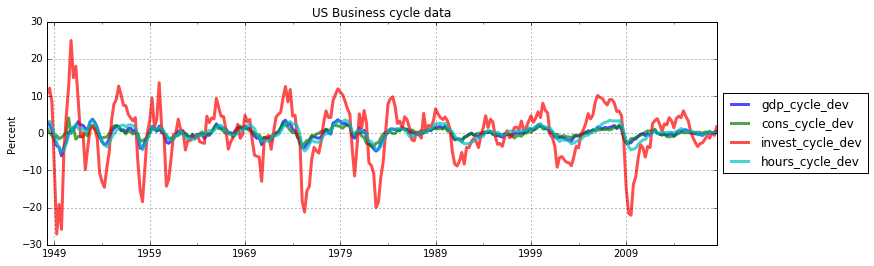

In [17]:
# Plot the cyclical components of GDP, consumption, investment, and hours (all times 100) on the same set of axes
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,1,1)
(df_cycle*100).plot(ax = ax,legend=False,lw=3,alpha=0.7)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel('Percent')
ax.set_title('US Business cycle data')
ax.grid()